# Fidelity from Magnetic Field Distribution

In [51]:
import numpy as np
from My_Function import hadamard_evolution, z_evolution, create_grid
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import pyplot as plt

Define input parameters:
- tot_field_variation = Gradient of field at the centre in T/mm
- sep = Separation between qubits on the chip in the x and y directions

create_grid returns 5x5 array containing distance between central qubit and outer qubits

In [63]:
sep = 0.2
tot_field_variation = 5*(10**(-6))
grid = create_grid(sep)

Multiply grid by field gradient to find what the 'extra' field at each point is

In [53]:
b_field = grid * tot_field_variation

$\Delta = g\mu_{B}\delta B$ is the coefficient that will go in front of $\sigma_{x}$ so we multiply our matrix by $ g\mu_{B}$

In [54]:
delta_H = b_field * 1.7588199959*(10**11)
delta_Z = b_field * 1.7588199959*(10**11)

## Hadamard Evolution

Loop over the deltas in the matrix to give an output fidelity for each qubit position

In [55]:
with np.nditer(delta_H, op_flags=['readwrite']) as it:
    for x in it:
           x[...] = hadamard_evolution(x)

In [56]:
(1-delta_H)*100

array([[4.67766922e-03, 1.82818590e-03, 1.17019978e-03, 1.82818590e-03,
        4.67766922e-03],
       [1.82818590e-03, 2.92570249e-04, 7.31091350e-05, 2.92570249e-04,
        1.82818590e-03],
       [1.17019978e-03, 7.31091350e-05, 3.85025345e-11, 7.31091350e-05,
        1.17019978e-03],
       [1.82818590e-03, 2.92570249e-04, 7.31091350e-05, 2.92570249e-04,
        1.82818590e-03],
       [4.67766922e-03, 1.82818590e-03, 1.17019978e-03, 1.82818590e-03,
        4.67766922e-03]])

## Z-Evolution

In [57]:
with np.nditer(delta_Z, op_flags=['readwrite']) as it:
    for x in it:
           x[...] = z_evolution(x)

In [58]:
(1-delta_Z)*100

array([[3.73228322e-03, 1.45979784e-03, 9.34574230e-04, 1.45979784e-03,
        3.73228322e-03],
       [1.45979784e-03, 2.33667004e-04, 5.83421996e-05, 2.33667004e-04,
        1.45979784e-03],
       [9.34574230e-04, 5.83421996e-05, 1.79611881e-10, 5.83421996e-05,
        9.34574230e-04],
       [1.45979784e-03, 2.33667004e-04, 5.83421996e-05, 2.33667004e-04,
        1.45979784e-03],
       [3.73228322e-03, 1.45979784e-03, 9.34574230e-04, 1.45979784e-03,
        3.73228322e-03]])

## Plotting Results

Text(0.5, 1.0, 'Z-Gate %Error Fidelity')

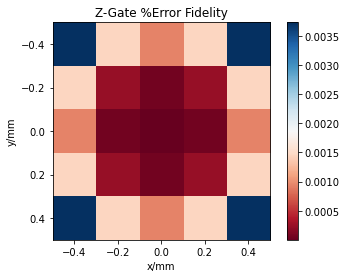

In [62]:
im = imshow((1-delta_Z)*100,cmap=cm.RdBu,extent=(-2.5*sep, 2.5*sep, 2.5*sep, -2.5*sep))
colorbar(im)
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('Z-Gate %Error Fidelity')

Text(0.5, 1.0, 'Hadamard Gate %Error Fidelity')

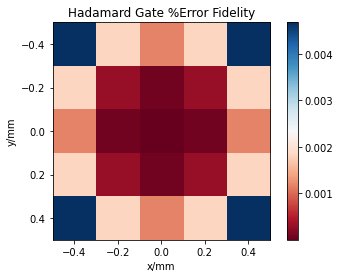

In [61]:
im = imshow((1-delta_H)*100,cmap=cm.RdBu,extent=(-2.5*sep, 2.5*sep, 2.5*sep, -2.5*sep))
colorbar(im)
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('Hadamard Gate %Error Fidelity')